In [7]:
import os
import math
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
data_path = '../Dataset/Batch-2/CSV_Files/CSV_Files'

files = [file for file in os.listdir(data_path) if file.endswith('.csv')]
files

['F0L.csv',
 'F0M.csv',
 'F1L.csv',
 'F1M.csv',
 'F2L.csv',
 'F2M.csv',
 'F3L.csv',
 'F3M.csv',
 'F4L.csv',
 'F4M.csv',
 'F5L.csv',
 'F5M.csv',
 'F6L.csv',
 'F6M.csv',
 'F7L.csv',
 'F7M.csv']

In [4]:
def windowing(data_path, save_path, width, overlap):
    if not os.path.exists(save_path):
        os.mkdir(save_path)
        
    counter = 0
    for file in tqdm(files):
        label = file[1:3]
        data_dict = pd.read_csv(os.path.join(data_path, file))
        data_dict = data_dict.drop('Time', axis=1)
    
        diff = width - overlap
        n = math.floor((len(data_dict) - overlap) / diff)
        
        for j in range(n):
            signals = np.array(data_dict.iloc[diff * j: width + diff * j])
            np.savez(os.path.join(save_path, str(counter).zfill(4)), signals=signals, label=label)
            counter += 1
            
windowing(data_path='../Dataset/Batch-2/CSV_Files/CSV_Files',
          save_path='../Dataset/Main-1000',
          width=1000,
          overlap=128)

windowing(data_path='../Dataset/Batch-2/CSV_Files/CSV_Files',
          save_path='../Dataset/Main-256',
          width=256,
          overlap=0)

100%|██████████| 16/16 [00:16<00:00,  1.00s/it]


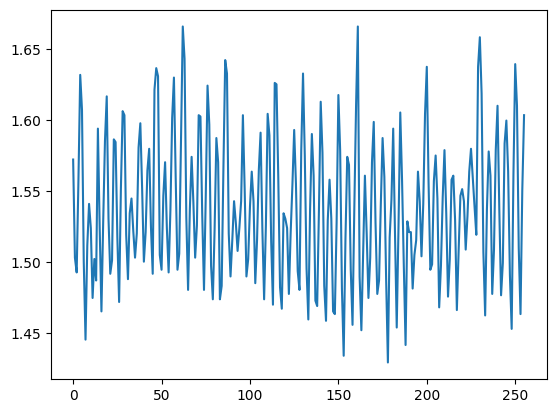

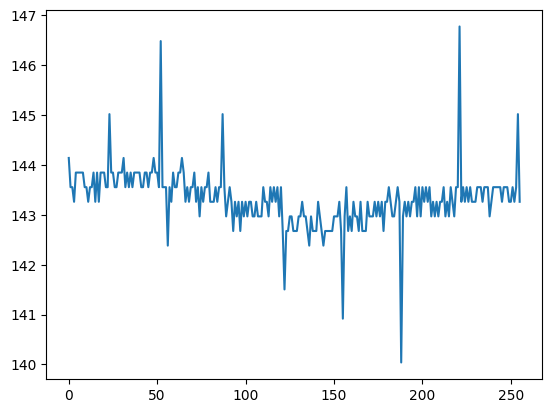

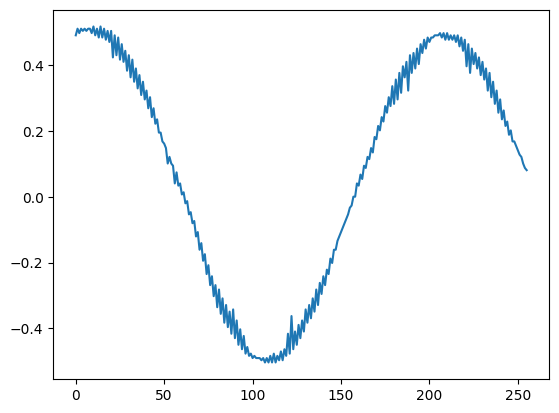

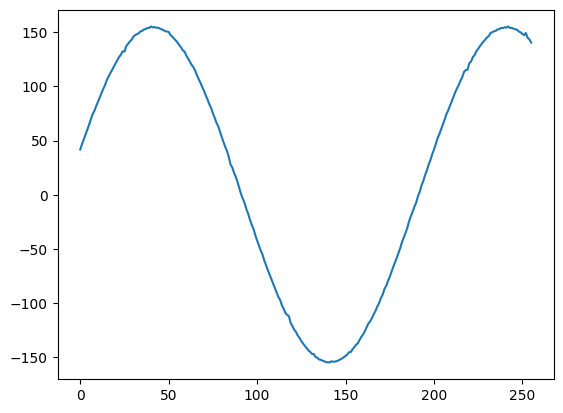

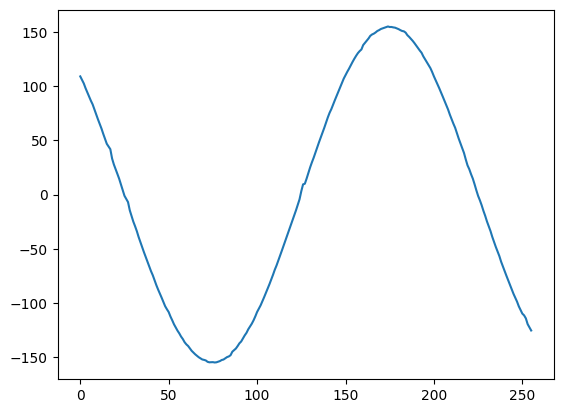

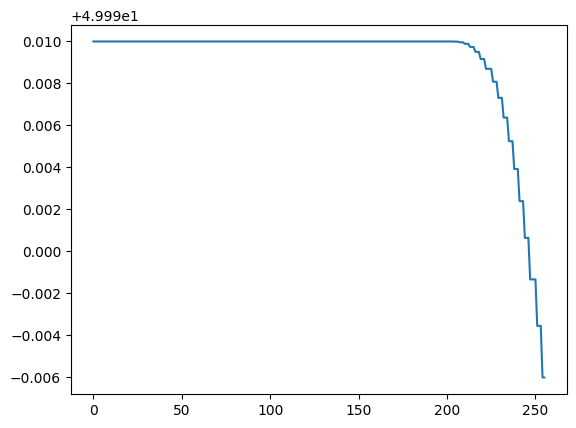

In [13]:
test_sample = np.load('../Dataset/Main-256/0000.npz')['signals']

plt.plot(test_sample[:, 0])
plt.show()

plt.plot(test_sample[:, 2])
plt.show()

plt.plot(test_sample[:, 4])
plt.show()

plt.plot(test_sample[:, 6])
plt.show()

plt.plot(test_sample[:, 8])
plt.show()

plt.plot(test_sample[:, 10])
plt.show()